# Let's Grow More- Virtual Internship Program June-22
## LGM-VIP DataScience

### Task- Develop A Neural Network That Can Read Handwriting

# Importing Essential Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Converting Data To CSV Formats

In [ ]:
def convert(imgf, labelf, outf, n):
    f = open(imgf, "rb")
    o = open(outf, "w")
    l = open(labelf, "rb")

    f.read(16)
    l.read(8)
    images = []

    for i in range(n):
        image = [ord(l.read(1))]
        for j in range(28*28):
            image.append(ord(f.read(1)))
        images.append(image)

    for image in images:
        o.write(",".join(str(pix) for pix in image)+"\n")
    f.close()
    o.close()
    l.close()


In [ ]:
convert("train-images.idx3-ubyte", "train-labels.idx1-ubyte","mnist_train.csv", 60000)
convert("t10k-images.idx3-ubyte", "t10k-labels.idx1-ubyte","mnist_test.csv", 10000)

# Loading Dataset

In [5]:
dataset_train = pd.read_csv('mnist_train.csv')
dataset_test = pd.read_csv('mnist_test.csv')

In [ ]:
dataset_train.head()

,5,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.608,0.609,0.610,0.611,0.612,0.613,0.614,0.615,0.616,0.617
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
dataset_test.head()

,7,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.658,0.659,0.660,0.661,0.662,0.663,0.664,0.665,0.666,0.667
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Rename Class Columns To Labels

In [ ]:
dataset_train.rename(columns={'5':'label'}, inplace=True)
dataset_test.rename(columns={'7':'label'}, inplace=True)

In [ ]:
dataset_train.to_csv('mnist_train.csv', index=False)
dataset_test.to_csv('mnist_test.csv', index=False)

In [6]:
y_train = np.array(dataset_train['label'])
y_train.shape

(59999,)

In [7]:
dataset_train.shape

(59999, 785)

In [8]:
X_train=dataset_train.drop('label',axis=1)
X_test=dataset_test.drop('label',axis=1)
y_test=np.array(dataset_test['label'])

In [9]:
X_train.shape,y_train.shape

((59999, 784), (59999,))

In [10]:
X_test.shape,y_test.shape

((9999, 784), (9999,))

In [11]:
type(X_train)

pandas.core.frame.DataFrame

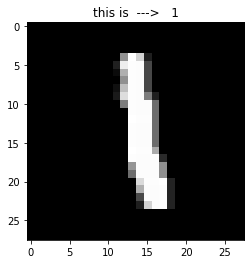

In [12]:
digit = np.array(X_train.loc[5,:])
digit = digit.reshape(28,28)
plt.title('this is  --->   ' + str(y_train[5]))
plt.imshow(digit, cmap='gray')

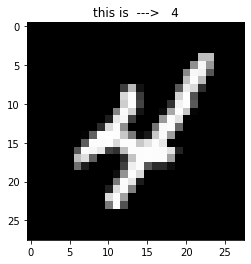

In [13]:
digit = np.array(X_train.loc[8,:])
digit = digit.reshape(28,28)
plt.title('this is  --->   ' + str(y_train[8]))
plt.imshow(digit, cmap='gray')

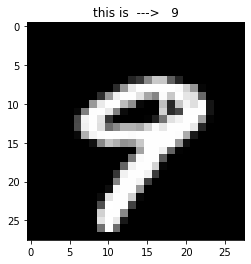

In [14]:
digit = np.array(X_test.loc[8,:])
digit = digit.reshape(28,28)
plt.title('this is  --->   ' + str(y_test[8]))
plt.imshow(digit, cmap='gray')

In [15]:
X_train.shape #0-59998

(59999, 784)

In [ ]:
for i in range(0,10):
    print(i)

0
1
2
3
4
5
6
7
8
9


In [16]:
X_train_images=[]
X_test_images=[]

In [17]:
for i in range(0,len(X_train)):
    digit = np.array(X_train.loc[i,:])
    digit = digit.reshape(28,28)
    X_train_images.append(digit)

In [18]:
for i in range(0,len(X_test)):
    digit = np.array(X_test.loc[i,:])
    digit = digit.reshape(28,28)
    X_test_images.append(digit)

1

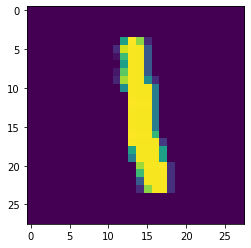

In [19]:
plt.imshow(np.array(X_train_images[5]))
y_train[5]

4

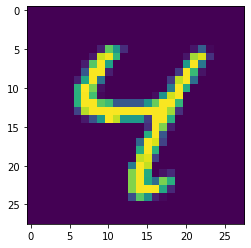

In [21]:
plt.imshow(np.array(X_test_images[5]))
y_test[5]

In [ ]:
len(X_test_images)

9999

In [ ]:
len(X_train_images)

59999

In [23]:
type(X_train_images),type(y_train)

(list, numpy.ndarray)

In [24]:
X_train_images=np.array(X_train_images)
X_test_images=np.array(X_test_images)

In [25]:
type(X_train_images),type(y_train)

(numpy.ndarray, numpy.ndarray)

In [26]:
type(X_test_images),type(y_test)

(numpy.ndarray, numpy.ndarray)

In [28]:
X_train_images.shape

(59999, 28, 28)

In [29]:
X_train_images[0].shape

(28, 28)

In [31]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

# Building Model - CNN
### Accuracy Obtained At 5 Epochs -> Training Accuracy=0.9842 , Validation Accurcay=0.9848

In [44]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [59]:
CNN=Sequential([
                  layers.Conv2D(16,3,padding='same',activation='relu',input_shape=[28,28,1]),
                  layers.MaxPool2D(pool_size=(2,2)),
                  layers.Conv2D(32,3,padding='same',activation='relu'),
                  layers.MaxPool2D(pool_size=(2,2)),
                  layers.Conv2D(64,3,padding='same',activation='relu'),
                  layers.MaxPool2D(pool_size=(2,2)),

                  layers.Dropout(0.2),
                  layers.Flatten(),

                  layers.Dense(80,activation='relu'),
                  layers.Dense(units=10, activation='softmax')
])

CNN.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=["accuracy"]
)

In [60]:
CNN.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 14, 14, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 14, 14, 32)        4640      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 7, 7, 32)         0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 7, 7, 64)          18496     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 3, 3, 64)        

In [61]:
X_test_images.shape,X_train_images.shape

((9999, 28, 28), (59999, 28, 28))

In [63]:
CNN.fit(X_train_images,y_train,epochs=5,batch_size=10,validation_data=(X_test_images,y_test))

Epoch 1/5
6000/6000 [==============================] - 95s 16ms/step - loss: 0.2600 - accuracy: 0.9352 - val_loss: 0.0534 - val_accuracy: 0.9826
Epoch 2/5
6000/6000 [==============================] - 93s 16ms/step - loss: 0.0884 - accuracy: 0.9739 - val_loss: 0.0626 - val_accuracy: 0.9813
Epoch 3/5
6000/6000 [==============================] - 92s 15ms/step - loss: 0.0709 - accuracy: 0.9794 - val_loss: 0.0685 - val_accuracy: 0.9814
Epoch 4/5
6000/6000 [==============================] - 97s 16ms/step - loss: 0.0616 - accuracy: 0.9822 - val_loss: 0.0362 - val_accuracy: 0.9895
Epoch 5/5
6000/6000 [==============================] - 95s 16ms/step - loss: 0.0561 - accuracy: 0.9842 - val_loss: 0.0546 - val_accuracy: 0.9848


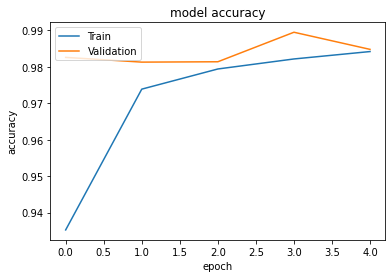

In [64]:
plt.plot(CNN.history.history['accuracy'])
plt.plot(CNN.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

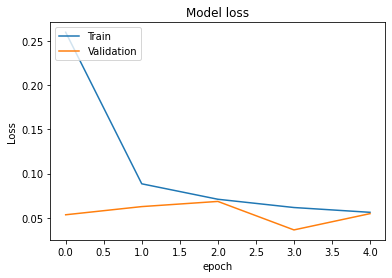

In [66]:
plt.plot(CNN.history.history['loss'])
plt.plot(CNN.history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()